# All about Feature Scaling:

<img src= "https://miro.medium.com/max/2400/1*_783tuRRVcTUwyFWB8VG0g.png" width="100%"  align="center"  hspace="5%" vspace="5%"/>

Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one.</p>

First of all Why we care About Feature Scaling?</b></p>

Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.<br>
The machine learning algorithm works on numbers and does not know what that number represents. A weight of 10 grams and a price of 10 dollars represents completely two different things — which is a no brainer for humans, but for a model as a feature, it treats both as same.</p>

Some examples of algorithms where feature scaling matters are:<br> K-nearest neighbors (KNN) with a Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally. <br> K-Means uses the Euclidean distance measure here feature scaling matters. <br> Scaling is critical while performing Principal Component Analysis(PCA). PCA tries to get the features with maximum variance, and the variance is high for high magnitude features and skews the PCA towards high magnitude features.<br> We can speed up gradient descent by scaling because θ descends quickly on small ranges and slowly on large ranges, and oscillates inefficiently down to the optimum when the variables are very uneven.<br> 

Algorithms that do not require normalization/scaling are the ones that rely on rules.<br> They would not be affected by any monotonic transformations of the variables. Scaling is a monotonic transformation.<br> Examples of algorithms in this category are all the tree-based algorithms — CART, Random Forests, Gradient Boosted Decision Trees. These algorithms utilize rules (series of inequalities) and do not require normalization.</p>

1. IMPORTING LIBRARIES:</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



2. IMPORTING DATA SETS:</p>

In [2]:
df=pd.read_csv("Iris.csv")

3. Most Common Techniques:</p>

3.1 Min-Max Scaler:</p>

<img src= "https://miro.medium.com/max/229/0*Gy668nQfirqf6W4c" width="50%"  align="center"  hspace="5%" vspace="5%"  />

Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one. This Scaler shrinks the data within the range of -1 to 1 if there are negative values. We can set the range like [0,1] or [0,5] or [-1,1].
This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian. This Scaler is sensitive to outliers.</p>

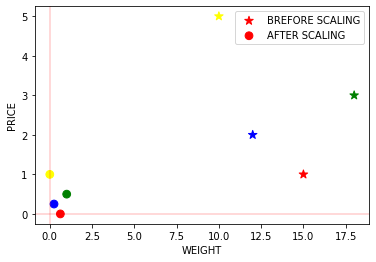

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
df1 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])


ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');

df1.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax);

plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

Let's Try on Iris Data Set:</p>

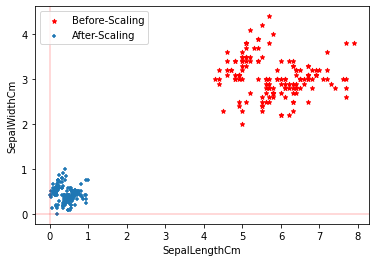

In [4]:
df=pd.read_csv("Iris.csv")
df.drop("Species",axis=1,inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=pd.DataFrame(scaler.fit_transform(df),columns=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
ax=df.plot.scatter(x="SepalLengthCm",y="SepalWidthCm",marker="*",label="Before-Scaling",color="red")
df1.plot.scatter(x="SepalLengthCm",y="SepalWidthCm",marker="+",label="After-Scaling",ax=ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);
plt.show()

3.2 Standard Scaler:</p>

The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1.
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. If data is not normally distributed, this is not the best Scaler to use.</p>

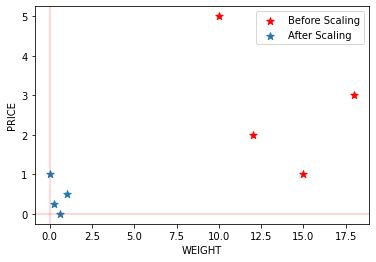

In [5]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()


df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])


df1=pd.DataFrame(scaler.fit_transform(df),columns=['WEIGHT', 'PRICE'],index = ['Orange','Apple','Banana','Grape'])

ax=df.plot.scatter(x="WEIGHT",y="PRICE",marker="*",s=60,label="Before Scaling",color="red")
df1.plot.scatter(x="WEIGHT",y="PRICE",marker="*",s=60,label="After Scaling",ax=ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

Let's Try on Iris Data Set:</p>

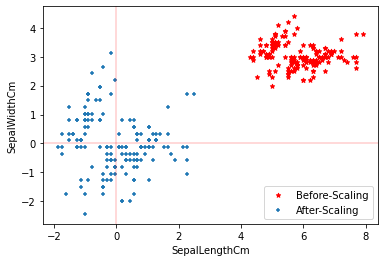

In [6]:
df=pd.read_csv("Iris.csv")
df.drop("Species",axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1=pd.DataFrame(scaler.fit_transform(df),columns=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
ax=df.plot.scatter(x="SepalLengthCm",y="SepalWidthCm",marker="*",label="Before-Scaling",color="red")
df1.plot.scatter(x="SepalLengthCm",y="SepalWidthCm",marker="+",label="After-Scaling",ax=ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);
plt.show()

3.3 Max Abs Scaler:</p>

Scale each feature by its maximum absolute value. This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set is 1.0. It does not shift/center the data and thus does not destroy any sparsity.
On positive-only data, this Scaler behaves similarly to Min Max Scaler and, therefore, also suffers from the presence of significant outliers.</p>

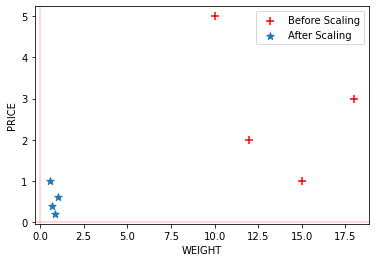

In [7]:
from sklearn.preprocessing import MaxAbsScaler
maxabsscaler=MaxAbsScaler()
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
df1=pd.DataFrame(maxabsscaler.fit_transform(df),columns=['WEIGHT', 'PRICE'],index = ['Orange','Apple','Banana','Grape'])

ax=df.plot.scatter(x="WEIGHT",y="PRICE",marker="+",s=60,label="Before Scaling",color="red")
df1.plot.scatter(x="WEIGHT",y="PRICE",marker="*",s=60,label="After Scaling",ax=ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

Let's Try on Iris Data Set:

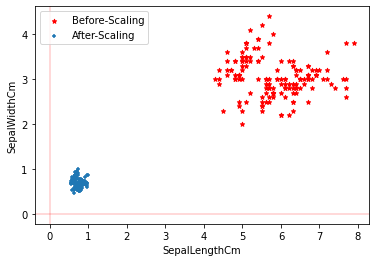

In [8]:
df=pd.read_csv("Iris.csv")
df.drop("Species",axis=1,inplace=True)
from sklearn.preprocessing import MaxAbsScaler
maxabsscaler=MaxAbsScaler()
df1=pd.DataFrame(maxabsscaler.fit_transform(df),columns=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
ax=df.plot.scatter(x="SepalLengthCm",y="SepalWidthCm",marker="*",label="Before-Scaling",color="red")
df1.plot.scatter(x="SepalLengthCm",y="SepalWidthCm",marker="+",label="After-Scaling",ax=ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);
plt.show()

3.4 Robust Scaler:</p>

As the name suggests, this Scaler is robust to outliers. If our data contains many outliers, scaling using the mean and standard deviation of the data won’t work well.
This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). The centering and scaling statistics of this Scaler are based on percentiles and are therefore not influenced by a few numbers of huge marginal outliers. Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required.</p>

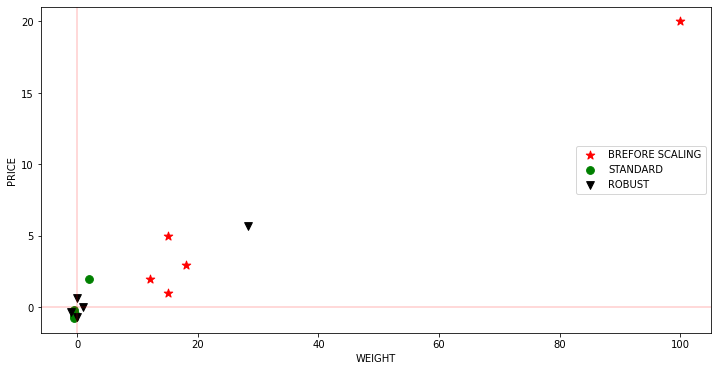

In [9]:
dfr = pd.DataFrame({'WEIGHT': [15, 18, 12,15,100],
                   'PRICE': [1,3,2,5,20]},
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df21 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
ax = dfr.plot.scatter(x='WEIGHT', y='PRICE',color="red", 
                     marker = '*',s=80, label='BREFORE SCALING');
df21.plot.scatter(x='WEIGHT', y='PRICE', color="green",
                 marker = 'o',s=60,label='STANDARD', ax = ax,figsize=(12,6))
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df31 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
df31.plot.scatter(x='WEIGHT', y='PRICE', color="black",
                 marker = 'v',s=60,label='ROBUST', ax = ax,figsize=(12,6))
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);